# DB에 있는 유기동물 정보 활용하기

공공데이터포털에서 가져온 데이터를 활용해 봅시다.

SQL을 잘 쓰면 신세계가 열리는 걸 확인할 수 있습니다.

## 라이브러리 사용

In [1]:
# sqlite3 사용

import sqlite3

sqlite3.version

'2.6.0'

In [2]:
# Pandas 사용

import pandas as pd

pd.__version__

'0.24.2'

In [3]:
# Matplotlib 사용

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.1'

In [4]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

## DB 접속

In [5]:
# 파일로 기록되는 데이터베이스에 연결/접속

connection = sqlite3.connect('test.db')

In [6]:
# Row를 사용하는 커서 얻기

connection.row_factory = sqlite3.Row

cursor = connection.cursor()

## 데이터 확인

In [7]:
# 데이터 갯수 확인

cursor.execute('SELECT COUNT(id) AS count FROM animals')

row = cursor.fetchone()

row['count']

30330

In [8]:
# 데이터 10개만 얻기

cursor.execute('SELECT * FROM animals LIMIT 10')

rows = cursor.fetchall()

pd.DataFrame(rows, columns=rows[0].keys())

,id,age,colorCd,happenDt,kindCd,orgNm,sexCd,weight
0,1,2014(년생),흰색,20191013,[개] 믹스견,전라남도 곡성군,M,20(Kg)
1,2,2014(년생),"흰색,검정",20191013,[개] 믹스견,전라남도 곡성군,F,10(Kg)
2,3,2014(년생),갈색,20191013,[개] 믹스견,전라남도 곡성군,M,5(Kg)
3,4,2019(년생),흰색,20191013,[개] 믹스견,전라남도 목포시,M,1.6(Kg)
4,5,2012(년생),흰색,20191013,[개] 말티즈,전라남도 목포시,M,3(Kg)
5,6,2017(년생),흰색/진노란색/검정색(반점),20191013,[개] 믹스견,경상남도 통영시,M,17.5(Kg)
6,7,2017(년생),흰색/크림색,20191013,[개] 믹스견,경상남도 통영시,M,13.5(Kg)
7,8,2019(년생),흰색&황갈,20191013,[개] 믹스견,전라남도 고흥군,F,3(Kg)
8,9,2019(년생),흰갈색,20191013,[개] 믹스견,전라북도 장수군,M,2(Kg)
9,10,2019(년생),흰갈색,20191013,[개] 믹스견,전라북도 장수군,F,2(Kg)


## GROUP BY

In [9]:
# age를 이용해 갯수 세기

sql = '''
SELECT age, COUNT(id) AS count
    FROM animals
    GROUP BY age
    ORDER BY count DESC
'''

cursor.execute(sql)

rows = cursor.fetchall()

# SQL에서 얻은 결과를 Pandas에서 사용하는 건 너무 쉽습니다.

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,age,count
0,2019(년생),15437
1,2018(년생),3702
2,2017(년생),3589
3,2016(년생),2804
4,2014(년생),1339
5,2015(년생),1263
6,2013(년생),659
7,2009(년생),406
8,2012(년생),405
9,2011(년생),371


In [10]:
# age를 index로 지정

df.set_index('age')

,count
age,
2019(년생),15437
2018(년생),3702
2017(년생),3589
2016(년생),2804
2014(년생),1339
2015(년생),1263
2013(년생),659
2009(년생),406
2012(년생),405


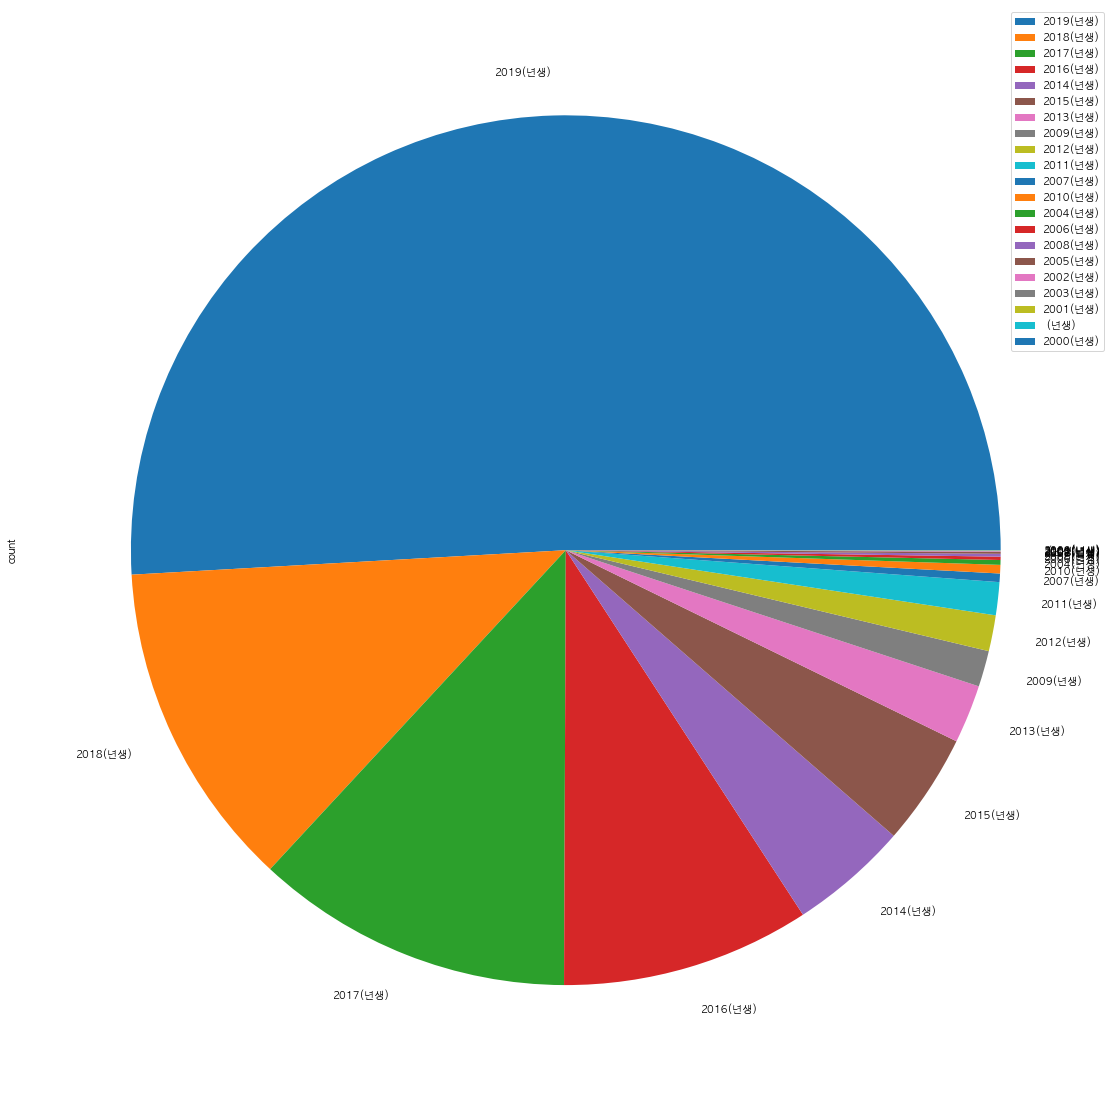

In [11]:
# 파이 차트 그리기

df.set_index('age').plot.pie(y='count', figsize=(20, 20))

plt.show()

In [12]:
# “경기도” orgNm 갯수 세기

sql = '''
SELECT orgNm, COUNT(id) AS count
    FROM animals
    WHERE orgNm LIKE ?
    GROUP BY orgNm
    ORDER BY count DESC
'''

cursor.execute(sql, ['%경기도%'])

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,orgNm,count
0,경기도 평택시,627
1,경기도 화성시,570
2,경기도 안산시,446
3,경기도 남양주시,444
4,경기도 고양시,441
5,경기도 수원시,336
6,경기도 포천시,266
7,경기도 시흥시,264
8,경기도 부천시,262
9,경기도 성남시,262


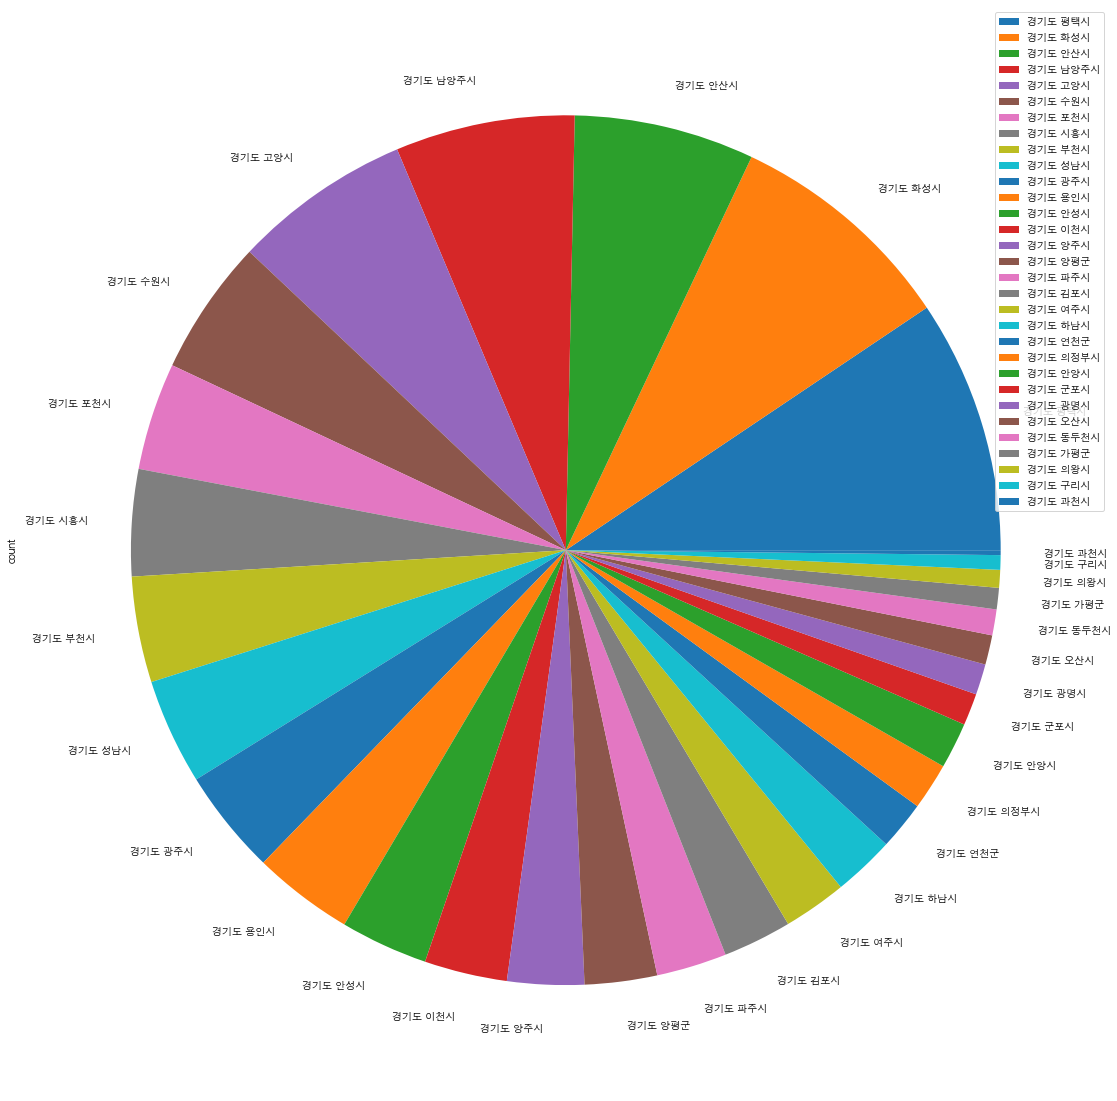

In [13]:
# 파이 차트 그리기

df.set_index('orgNm').plot.pie(y='count', figsize=(20, 20))

plt.show()

In [14]:
# “[개]” kindCd 갯수 세기

sql = '''
SELECT kindCd, COUNT(id) AS count
    FROM animals
    WHERE kindCd LIKE ?
    GROUP BY kindCd
    ORDER BY count DESC
    LIMIT 50
'''

cursor.execute(sql, ['%[개]%'])

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,kindCd,count
0,[개] 믹스견,14745
1,[개] 말티즈,1356
2,[개] 푸들,1248
3,[개] 진도견,667
4,[개] 포메라니안,458
5,[개] 시츄,398
6,[개] 요크셔 테리어,299
7,[개] 스피츠,249
8,[개] 라브라도 리트리버,217
9,[개] 치와와,213


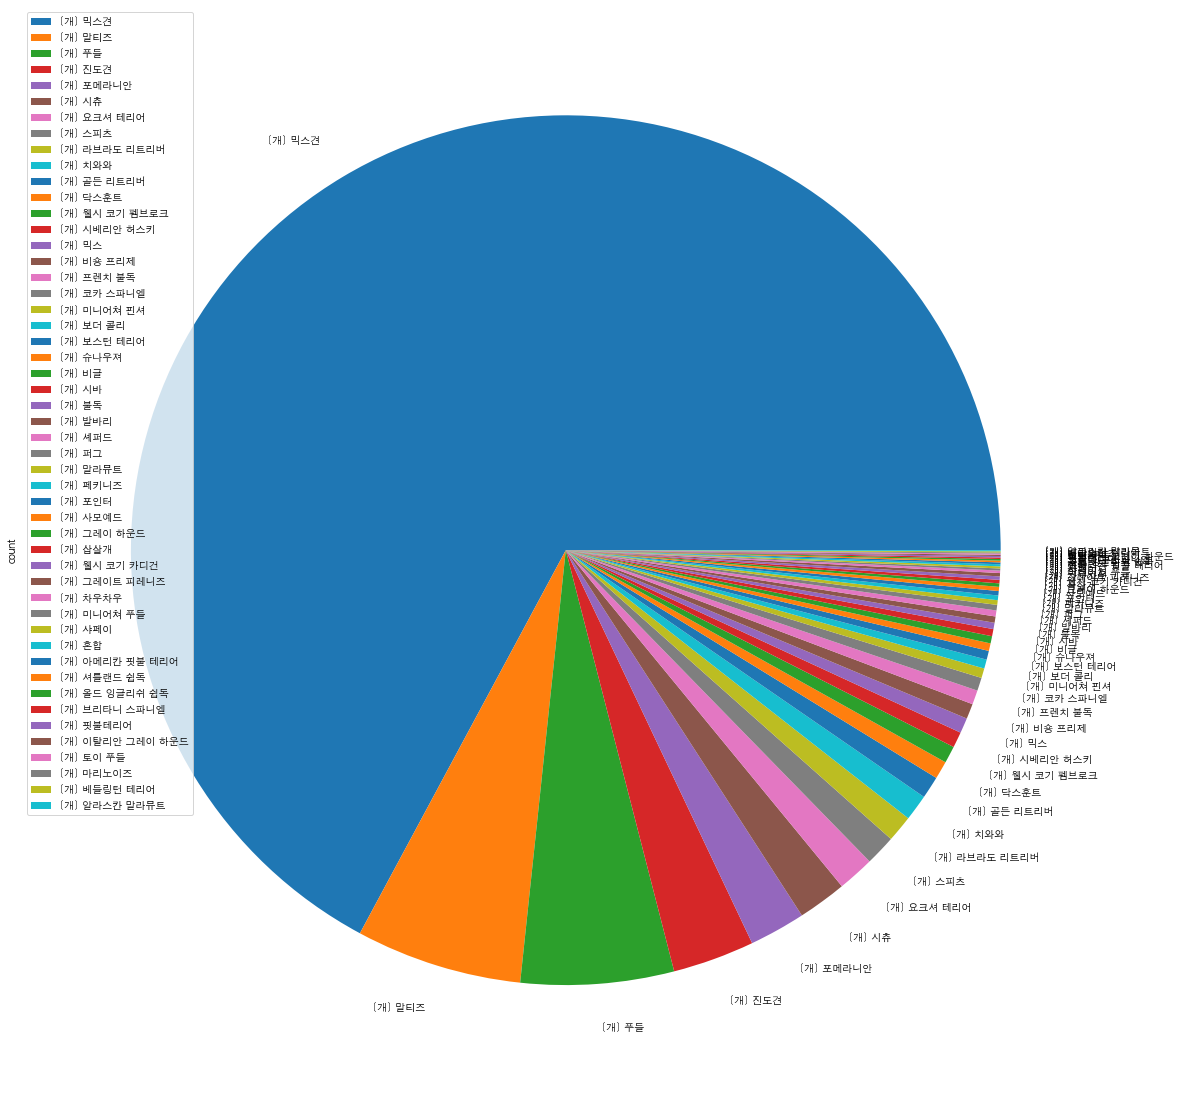

In [15]:
# 파이 차트 그리기

df.set_index('kindCd').plot.pie(y='count', figsize=(20, 20))

plt.show()

## DB 사용 종료

잘 썼습니다! (꾸벅)

In [16]:
connection.close()